# Data Cleaning for Sentiment Analysis on Mental Health Dataset

Data cleaning is a crucial first step in any data analysis project. In this notebook, we prepare a raw mental health sentiment analysis dataset for further exploration and modeling. The goal is to transform the raw data into a high-quality, reliable dataset for analysis.

---

### **Process Overview:**

- **Handling Missing Values:** We identify and extract all rows with missing data and review their distribution across sentiment classes. These rows are separated for possible further inspection or removal.  
- **Removing Duplicates:** Duplicate rows are detected and removed to ensure each entry in the dataset is unique.  
- **Text Normalization:** We clean the text data by removing extra whitespace and standardizing formatting using regular expressions.  
- **Filtering Non-informative Samples:** We exclude statements that are either too short (under 10 characters) or excessively long, as both extremes may lack useful context for sentiment classification.

---

The cleaned dataset is exported as a CSV file, providing a dependable foundation for sentiment analysis and model development.
iment analysis results on mental health data are based on clear, complete, and consistent input.


## 1. Importing Required Libraries

In [38]:
print("Process Start: Importing required libraries...")
import time
start = time.time()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
print(f"✓ Libraries imported (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Importing required libraries...
✓ Libraries imported (Time taken: 0.00s)



## 2. Loading the Dataset

In [40]:
print("Process Start: Loading dataset...")
start = time.time()
try:
    df = pd.read_csv('Sentiment Analysis for Mental Health Dataset.csv')
    print(f"✓ Dataset loaded: {df.shape[0]} records, {df.shape[1]} columns (Time taken: {time.time()-start:.2f}s)")
except FileNotFoundError:
    print("✗ ERROR: Dataset not found.")
    raise
except Exception as e:
    print(f"✗ Unexpected error: {e}")
    raise

Process Start: Loading dataset...
✓ Dataset loaded: 53043 records, 3 columns (Time taken: 0.37s)


## 3. Identifying and Extracting Rows with Missing Data
Find and extract any rows with missing values for inspection or targeted processing.

In [42]:
print("Process Start: Identifying rows with missing data...")
start = time.time()
missing = df.isnull().any(axis=1)
missing_df = df[missing]
print(f"✓ Found {missing_df.shape[0]} rows with missing data (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Identifying rows with missing data...
✓ Found 362 rows with missing data (Time taken: 0.01s)



## 4. Displaying Rows with Missing Data
Visualize and inspect the distribution and nature of missing data by class.

In [44]:
print("Process Start: Displaying missing data rows...")
start = time.time()
print(missing_df)
print(f"✓ Display complete (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Displaying missing data rows...
       Unnamed: 0 statement   status
293           293       NaN  Anxiety
572           572       NaN  Anxiety
595           595       NaN  Anxiety
1539         1539       NaN   Normal
2448         2448       NaN   Normal
...           ...       ...      ...
52838       52838       NaN  Anxiety
52870       52870       NaN  Anxiety
52936       52936       NaN  Anxiety
53010       53010       NaN  Anxiety
53031       53031       NaN  Anxiety

[362 rows x 3 columns]
✓ Display complete (Time taken: 0.00s)



## 5. Visualizing Class Distribution of Missing DataUnderstand how missing data is distributed among different sentiment categories to check for potential bias.


Process Start: Visualizing class distribution among missing data...


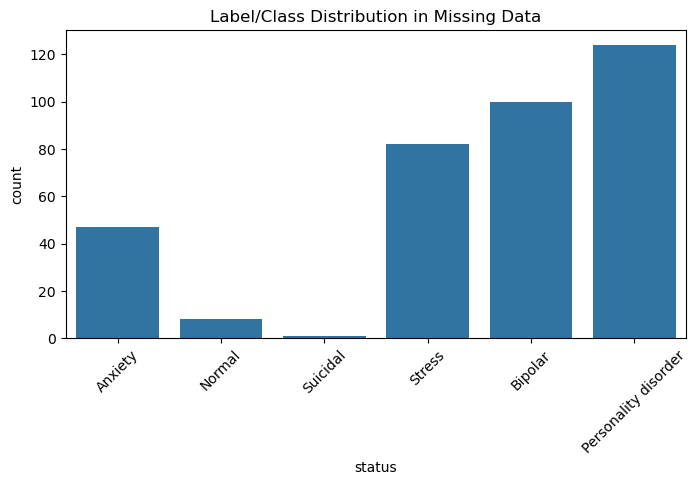

status
Personality disorder    124
Bipolar                 100
Stress                   82
Anxiety                  47
Normal                    8
Suicidal                  1
Name: count, dtype: int64
✓ Class distribution visualization (Time taken: 0.11s)



In [46]:
print("Process Start: Visualizing class distribution among missing data...")
start = time.time()
plt.figure(figsize=(8,4))
sns.countplot(x="status", data=missing_df)
plt.title("Label/Class Distribution in Missing Data")
plt.xticks(rotation=45)
plt.show()
print(missing_df['status'].value_counts())
print(f"✓ Class distribution visualization (Time taken: {time.time()-start:.2f}s)\n")

*Decision Note: Visualizing helps determine if missing data disproportionately affects particular sentiment classes. This awareness helps prevent introducing class bias during cleaning.*

## 6. Extracting Rows Without Missing Data
Separate and retain only those rows with no missing values for clean analysis.

In [49]:
print("Process Start: Extracting complete data rows...")
start = time.time()
clean_df = df[~missing]
print(clean_df)
print(f"✓ Cleaned data extraction (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Extracting complete data rows...
       Unnamed: 0                                          statement   status
0               0                                         oh my gosh  Anxiety
1               1  trouble sleeping, confused mind, restless hear...  Anxiety
2               2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3               3  I've shifted my focus to something else but I'...  Anxiety
4               4  I'm restless and restless, it's been a month n...  Anxiety
...           ...                                                ...      ...
53038       53038  Nobody takes me seriously I’ve (24M) dealt wit...  Anxiety
53039       53039  selfishness  "I don't feel very good, it's lik...  Anxiety
53040       53040  Is there any way to sleep better? I can't slee...  Anxiety
53041       53041  Public speaking tips? Hi, all. I have to give ...  Anxiety
53042       53042  I have really bad door anxiety! It's not about...  Anxiety

[52681 rows x 3

*We delete rows with missing data because these samples can't be reliably filled using `standard methods`, and leaving them in the dataset can cause class imbalance or hurt model accuracy.*

## 7. Checking for Duplicate Rows
Check for and flag any duplicate rows, as duplicates can distort statistics and model learning.

In [52]:
print("Process Start: Checking for duplicates...")
start = time.time()
duplicates_exist = clean_df.duplicated().any()
print(f"✓ Duplicates exist: {duplicates_exist} (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Checking for duplicates...
✓ Duplicates exist: False (Time taken: 0.08s)



## 8. Preparing DataFrame Copy and Ensuring String Type

In [54]:
print("Process Start: Copying dataframe and enforcing string type on 'statement'...")
start = time.time()
clean_df = clean_df.copy()
clean_df['statement'] = clean_df['statement'].astype(str)
print(f"✓ DataFrame copy and type normalization complete (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Copying dataframe and enforcing string type on 'statement'...
✓ DataFrame copy and type normalization complete (Time taken: 0.00s)



*Decision Note: Consistent datatypes prevent type errors during normalization and vectorization.*

## 9. Stripping Whitespace in Statements
*Remove any leading or trailing spaces from the text, promoting data consistency.*

In [57]:
print("Process Start: Stripping whitespace from 'statement'...")
start = time.time()
clean_df['statement'] = clean_df['statement'].str.strip()
print(f"✓ Whitespace stripped (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Stripping whitespace from 'statement'...
✓ Whitespace stripped (Time taken: 0.01s)



## 10. Normalizing Whitespace Using Regex
*Replace multiple spaces with a single space using regular expressions for uniform text formatting.*

In [59]:
print("Process Start: Normalizing whitespace using regex...")
start = time.time()
clean_df['statement'] = clean_df['statement'].apply(lambda x: re.sub(r" +", " ", str(x)))
print(f"✓ Regex normalization complete (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Normalizing whitespace using regex...
✓ Regex normalization complete (Time taken: 1.09s)



## 11. Dropping Short Entries (Less Than 10 Characters) and Displaying Shortest Sample
*Filter out statements that are too short to provide substantial sentiment information and displaying the new shortest sample*

In [61]:
print("Process Start: Filtering short statements (<10 chars)...")
start = time.time()
clean_df = clean_df[clean_df['statement'].str.len() >= 10]
shortest_idx = clean_df['statement'].str.len().idxmin()
print("Shortest Sample:", clean_df.loc[shortest_idx, 'statement'])
print("Length of Shortest Sample:", clean_df['statement'].str.len().min())
print(f"✓ Short statement filtering complete (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Filtering short statements (<10 chars)...
Shortest Sample: oh my gosh
Length of Shortest Sample: 10
✓ Short statement filtering complete (Time taken: 0.05s)



*Decision Note: A minimum threshold of **10 characters** is chosen to ensure that only meaningful statements are included in the dataset. Very short inputs such as single words or brief responses typically fail to convey the emotional tone, sentiment, or context required for reliable classification. This filtering step improves data quality and enhances model interpretability.*

## 12. Filtering Out Excessively Long Statements
*In addition to removing extremely short entries, it is important to filter out unusually long statements in the dataset. Long, repetitive, or spamlike entries can skew feature distributions and negatively affect the performance of NLP models.*


In [64]:
print("Process Start: Filtering excessively long statements (>1200 chars)...")
start = time.time()
clean_df = clean_df[clean_df['statement'].str.len() <= 1200]
longest_idx = clean_df['statement'].str.len().idxmax()
print("Longest Sample:", clean_df.loc[longest_idx, 'statement'])
print("Length of Longest Sample:", clean_df['statement'].str.len().max())
print(f"✓ Long statement filtering complete (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Filtering excessively long statements (>1200 chars)...
Longest Sample: I was diagnosed as schizoaffective by a few different doctors. But I do not believe I have it. I am on a court order (CTO) and that means if I miss 1 injection, the cops come to my house and take me to hospital. I absolutely refuse to take my injection because I believe I do NOT have this illness. My mom came into my room today and said that my dad said I have been pretending to be sick and to "just give it up". He wants me to get out and work. And he is pissed that I am not going for my injection. He wants to kick me out on the streets because I "disgust" him. I do find this very weird because he is considered my substitute decision maker because I have been found "mentally incapable of making medical decisions" and he has NEVER said I was lying in the past to the psychiatrists. he is just saying this to my mother. But I have noticed that when I get very mad (I believe this is due to borderline perso

*Decision Note: A maximum limit of **1200 characters** is set to exclude excessively long statements. This value represents roughly three to four times the median and twice the mean statement length in the dataset. It ensures only outliers are removed, keeping the overall data balanced, representative, and suitable for model development.*

## 13. Saving the Cleaned Dataset to CSV

In [67]:
print("Process Start: Exporting cleaned dataset...")
start = time.time()
clean_df.to_csv('cleaned_dataset.csv', index=False)
print(f"✓ Cleaned dataset exported as 'cleaned_dataset.csv' (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Exporting cleaned dataset...
✓ Cleaned dataset exported as 'cleaned_dataset.csv' (Time taken: 0.18s)



*Decision Note: Exporting as CSV supports reproducibility and pipeline interoperability.*